In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

1. Divide the dataset into a training set of size 100, and test set of size 100.

In [ ]:
data_poly = pd.read_csv('/content/polynomial200.csv', header=None)
data_poly.columns = ['x','y']
#data_poly = data_poly.sample(frac=1,random_state=0).reset_index(drop=True)
data_poly_train = data_poly[:len(data_poly)//2]
data_poly_test = data_poly[len(data_poly)//2 : ]

2. Plot the training and test set side-by-side in a 1 x 2 pattern.

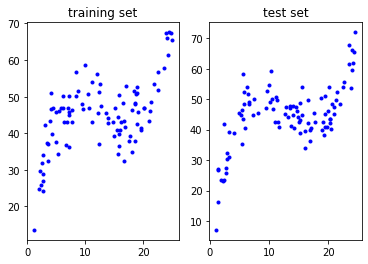

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(data_poly_train['x'],data_poly_train['y'],'b.')
ax2.plot(data_poly_test['x'],data_poly_test['y'],'b.')
ax1.set_title("training set")
ax2.set_title("test set")
plt.show()

3. Display a 2 x 2 plot showing the k-NN regression result and the MSE training error for
k = 1; 3; 5; 7.

In [ ]:
def knnRegressor(t, data, k=5):
  dist = []
  for i in range(len(data)):
    dist.append((t['x']-data.iloc[i]['x'])**2)
  min_dist = np.argsort(np.array(dist))[:k]
  sub_data = data.iloc[min_dist]
  mean_y = np.mean(list(sub_data['y']))

  return mean_y

In [ ]:
K = [1,3,5,7]
predictions_list = []
error_list = []
for k in K:
  print("Started predictions for k = ",k)
  predictions = []
  error = 0
  for i in range(len(data_poly_train)):
    pred_y = knnRegressor(data_poly_train.iloc[i],data_poly_train,k)
    predictions.append(pred_y)
    error = error + ((data_poly_train.iloc[i]['y'] - pred_y)**2)
  predictions_list.append(predictions)
  error_list.append(error/len(data_poly_train))
  print("Training MSE for k = ", k, " : ",error/len(data_poly_train))

Started predictions for k =  1
Training MSE for k =  1  :  0.0
Started predictions for k =  3
Training MSE for k =  3  :  18.0487887885286
Started predictions for k =  5
Training MSE for k =  5  :  22.252397794297227
Started predictions for k =  7
Training MSE for k =  7  :  23.564981168352976


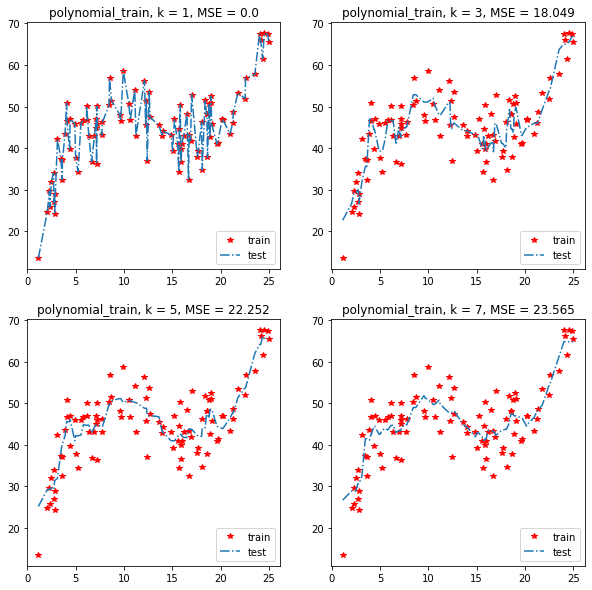

In [ ]:
sorted_indices = np.argsort(data_poly_train['x'])


plt.show()

fig, axs = plt.subplots(2, 2,figsize=(10,10))

axs[0, 0].plot(data_poly_train['x'][sorted_indices],data_poly_train['y'][sorted_indices],'r*')
axs[0, 0].plot(data_poly_train['x'][sorted_indices],np.array(predictions_list[0])[sorted_indices],'-.')
axs[0, 0].legend(["train", "test"], loc ="lower right")
title = "polynomial_train, k = 1, MSE = "+str(np.round(error_list[0],3))
axs[0, 0].set_title(title)

axs[0, 1].plot(data_poly_train['x'][sorted_indices],data_poly_train['y'][sorted_indices],'r*')
axs[0, 1].plot(data_poly_train['x'][sorted_indices],np.array(predictions_list[1])[sorted_indices],'-.')
axs[0, 1].legend(["train", "test"], loc ="lower right")
title = "polynomial_train, k = 3, MSE = "+str(np.round(error_list[1],3))
axs[0, 1].set_title(title)

axs[1, 0].plot(data_poly_train['x'][sorted_indices],data_poly_train['y'][sorted_indices],'r*')
axs[1, 0].plot(data_poly_train['x'][sorted_indices],np.array(predictions_list[2])[sorted_indices],'-.')
axs[1, 0].legend(["train", "test"], loc ="lower right")
title = "polynomial_train, k = 5, MSE = "+str(np.round(error_list[2],3))
axs[1, 0].set_title(title)

axs[1, 1].plot(data_poly_train['x'][sorted_indices],data_poly_train['y'][sorted_indices],'r*')
axs[1, 1].plot(data_poly_train['x'][sorted_indices],np.array(predictions_list[3])[sorted_indices],'-.')
axs[1, 1].legend(["train", "test"], loc ="lower right")
title = "polynomial_train, k = 7, MSE = "+str(np.round(error_list[3],3))
axs[1, 1].set_title(title)

plt.show()

4. Compute and present the MSE test error for k = 1, 3, 5, 7.

In [ ]:
K = [1,3,5,7]
test_len = len(data_poly_test)
for k in K:
  error = 0
  for i in range(len(data_poly_test)):
    pred_y = knnRegressor(data_poly_test.iloc[i],data_poly_train,k)
    predictions.append(pred_y)
    error = error + ((data_poly_test.iloc[i]['y'] - pred_y)**2)
  print("Test MSE for k = ", k, "is : ", error/test_len)

Test MSE for k =  1 is :  49.23744633007052
Test MSE for k =  3 is :  31.57697051078499
Test MSE for k =  5 is :  28.484684665500794
Test MSE for k =  7 is :  29.2299787575255


5. Which k gives the best regression? Motivate your answer!

K = 5 gave the best regression model. This is because, test MSE is the least in case of k = 5.